<a href="https://colab.research.google.com/github/MoayadBatwa/NLP-SentimentAnalysis/blob/main/SentimentAnalysis_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step	Description

0	--- Install needed libraries.

1	--- Imported libraries and loaded the Airline Tweets dataset.

2	--- Cleaned the text by removing handles, special characters, and stopwords.

3	--- Converted text to numbers using TF-IDF Vectorization.

4	--- Split data into Training (80%) and Testing (20%) sets.

5	--- Trained a Logistic Regression classifier.

6	--- Evaluated the model using Accuracy and Classification Report.

7	--- Visualized performance using a Confusion Matrix.

8 ---	Created a batch function to classify a list of custom strings provided by the user.

## Step 0: Install Libraries

In [23]:
pip install pandas nltk matplotlib seaborn

## Step 1: Imports and Setup

In [24]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Step 2: Loading and Inspecting Data

Sample of the dataset:
  airline_sentiment                                               text
0           neutral                @VirginAmerica What @dhepburn said.
1          positive  @VirginAmerica plus you've added commercials t...
2           neutral  @VirginAmerica I didn't today... Must mean I n...
3          negative  @VirginAmerica it's really aggressive to blast...
4          negative  @VirginAmerica and it's a really big bad thing...



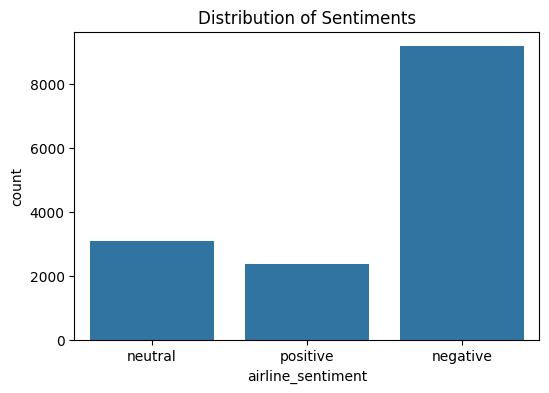

In [39]:
df = pd.read_csv('Tweets.csv')

print("Sample of the dataset:")
print(df[['airline_sentiment', 'text']].head())
print()
plt.figure(figsize=(6,4))
sns.countplot(x='airline_sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.show()

## Step 3: Data Preprocessing

In [26]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'@\w+', '', text)  # Remove @mentions
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove special chars
    words = text.split()
    filtered_words = [w for w in words if w not in stop_words]
    return " ".join(filtered_words)

df['clean_text'] = df['text'].apply(clean_text)

## Step 4: Feature Extraction (TF-IDF)

In [27]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text']).toarray()
y = df['airline_sentiment']

## Step 5: Splitting the Dataset

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 6: Model Training

In [34]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Step 7: Evaluation

In [35]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 79.85%

Classification Report:
              precision    recall  f1-score   support

    negative       0.82      0.94      0.88      1889
     neutral       0.67      0.48      0.56       580
    positive       0.83      0.61      0.70       459

    accuracy                           0.80      2928
   macro avg       0.77      0.68      0.71      2928
weighted avg       0.79      0.80      0.79      2928



## Step 8: Visualization of Results

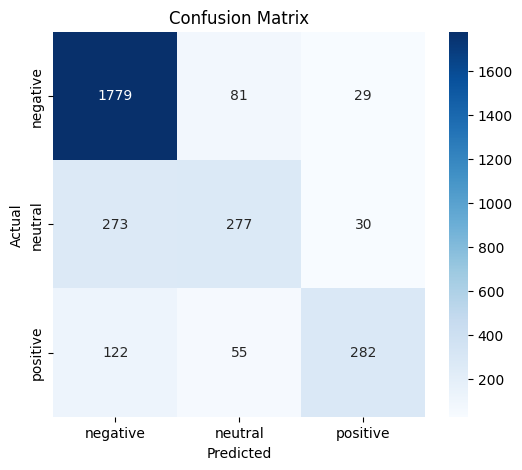

In [36]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Step 8: Batch Prediction (List of Inputs)

In [44]:
def predict_batch(tweet_list):
    print(f"\n--- Processing {len(tweet_list)} Tweets ---\n")

    for text in tweet_list:
        cleaned = clean_text(text)

        vectorized = tfidf.transform([cleaned]).toarray()

        prediction = model.predict(vectorized)[0]

        print(f"Tweet: '{text}'")
        print(f"Prediction: {prediction.upper()}")
        print("-" * 30)

user_inputs = [
    "The flight was absolutely amazing and on time!",
    "Worst experience ever, they lost my luggage.",
    "It was an okay flight, nothing special.",
    "It was an okay flight.",
    "Customer service was helpful but the food was cold."
]

predict_batch(user_inputs)


--- Processing 5 Tweets ---

Tweet: 'The flight was absolutely amazing and on time!'
Prediction: POSITIVE
------------------------------
Tweet: 'Worst experience ever, they lost my luggage.'
Prediction: NEGATIVE
------------------------------
Tweet: 'It was an okay flight, nothing special.'
Prediction: NEGATIVE
------------------------------
Tweet: 'It was an okay flight.'
Prediction: NEUTRAL
------------------------------
Tweet: 'Customer service was helpful but the food was cold.'
Prediction: NEGATIVE
------------------------------
